## **Palmer Penguins**
***






-   3 species of penguins: Adelie, Chinstrap and Gentoo 
-   3 islands: Biscoe, Dream and Torgersen
-   Each row in the dataset represents a penguin, Each column represents a variable.
-   7 variables. 3 of which are categorical variables. These include species, island and sex. 
-   4 numerical variables. These include body mass(g), flipper length(mm), bill length(mm) and bill depth(mm).  



***






**1. Imports:**

[Pandas](https://pandas.pydata.org/docs/user_guide/10min.html)  is a python library for data manipulation and analysis built on top of Numpy. It is used for the dataFrame data structure. A pandas dataFrame is a 2D array or a table with rows and columns.

 [Numpy](https://numpy.org/doc/stable/user/whatisnumpy.html) is a powerful library for numerical computing of Python. Pandas is a library for data manipulation and analysis built on top of Numpy. It is used for the dataFrame data structure. 
 
 [Matplotlib](https://www.w3schools.com/python/matplotlib_intro.asp). Matplotlib is a graph plotting library in python
 
 [Seaborn](https://www.w3schools.com/python/numpy/numpy_random_seaborn.asp). Seaborn is a library that uses Matplotlib underneath to plot graphs



In [1]:

import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


***
**2. Load Data:**


The dataset was loaded from the .csv file obtaind from the seaborn github repository into a dataFrame using Pandas. 

The first and last rows were looked at

In [2]:
# Load the penguins data set from URL.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [3]:
# Quick look at first and last few rows of the data set.

df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


***
**3. Inspect Data:**


In [4]:
#count the sex of the penguins
df['sex'].value_counts()


sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [5]:
# count the sex per species
df.groupby ('species')['sex'].value_counts()

species    sex   
Adelie     FEMALE    73
           MALE      73
Chinstrap  FEMALE    34
           MALE      34
Gentoo     MALE      61
           FEMALE    58
Name: count, dtype: int64

In [6]:
# information about the data set
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


float64(4) indicates that there are four variables in the dataset which are numerical variables that represent floating point numbers up to 64 bits, which allows for a wider range of values to be analysed and higher precision in decimals. 

object represents variables that contain non-numeric data or mixed datatypes within the NumPy array or pandas dataFrame. object(3) indicates that there are three columns or variables within the dataset that are type object. the object dtype in pandas usually represents strings. object dtypes might contain text, categotical data. 





In [7]:
# check missing values
df.isna().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
# Rows with missing values
df[df.isnull().any(axis=1)]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


**4. Summary statistics:**

In [9]:
df.describe() 

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [10]:
df.shape

(344, 7)

In [11]:
# remove missing values 
df.dropna(inplace=True)

df.shape


(333, 7)

In [12]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [13]:
# mean by species, sex and island
df.groupby(['species', 'sex', 'island']).mean()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   sex    island                                                        
Adelie    FEMALE Biscoe          37.359091      17.704545         187.181818   
                 Dream           36.911111      17.618519         187.851852   
                 Torgersen       37.554167      17.550000         188.291667   
          MALE   Biscoe          40.590909      19.036364         190.409091   
                 Dream           40.071429      18.839286         191.928571   
                 Torgersen       40.586957      19.391304         194.913043   
Chinstrap FEMALE Dream           46.573529      17.588235         191.735294   
          MALE   Dream           51.094118      19.252941         199.911765   
Gentoo    FEMALE Biscoe          45.563793      14.237931         212.706897   
          MALE   Biscoe          49.473770      15.718033         221.540984   

                            body_mass_g  
species   sex    island                  
Adelie    FEMALE Biscoe     3369.318182  
                 Dream      3344.444444  
                 Torgersen  3395.833333  
          MALE   Biscoe     4050.000000  
                 Dream      4045.535714  
                 Torgersen  4034.782609  
Chinstrap FEMALE Dream      3527.205882  
          MALE   Dream      3938.970588  
Gentoo    FEMALE Biscoe     4679.741379  
          MALE   Biscoe     5484.836066

In [14]:
# describe body mass per species
df.groupby('species')['body_mass_g'].describe()


,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,3706.164384,458.620135,2850.0,3362.5,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,119.0,5092.436975,501.476154,3950.0,4700.0,5050.0,5500.0,6300.0


In [15]:
# describe flipper length per species
df.groupby('species')['flipper_length_mm'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,190.102740,6.521825,172.0,186.0,190.0,195.0,210.0
Chinstrap,68.0,195.823529,7.131894,178.0,191.0,196.0,201.0,212.0
Gentoo,119.0,217.235294,6.585431,203.0,212.0,216.0,221.5,231.0


In [16]:
# describe flipper length per species and sex
df.groupby(['species', 'sex'])['flipper_length_mm'].describe()

count        mean       std    min     25%    50%     75%  \
species   sex                                                                 
Adelie    FEMALE   73.0  187.794521  5.595035  172.0  185.00  188.0  191.00   
          MALE     73.0  192.410959  6.599317  178.0  189.00  193.0  197.00   
Chinstrap FEMALE   34.0  191.735294  5.754096  178.0  187.25  192.0  195.75   
          MALE     34.0  199.911765  5.976558  187.0  196.00  200.5  203.00   
Gentoo    FEMALE   58.0  212.706897  3.897856  203.0  210.00  212.0  215.00   
          MALE     61.0  221.540984  5.673252  208.0  218.00  221.0  225.00   

                    max  
species   sex            
Adelie    FEMALE  202.0  
          MALE    210.0  
Chinstrap FEMALE  202.0  
          MALE    212.0  
Gentoo    FEMALE  222.0  
          MALE    231.0

In [17]:
# describe bill length per species
df.groupby('species')['bill_length_mm'].describe()



,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,38.823973,2.662597,32.1,36.725,38.85,40.775,46.0
Chinstrap,68.0,48.833824,3.339256,40.9,46.350,49.55,51.075,58.0
Gentoo,119.0,47.568067,3.106116,40.9,45.350,47.40,49.600,59.6


In [18]:
# describe bill depth per species
df.groupby('species')['bill_depth_mm'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,18.347260,1.219338,15.5,17.5,18.40,19.00,21.5
Chinstrap,68.0,18.420588,1.135395,16.4,17.5,18.45,19.40,20.8
Gentoo,119.0,14.996639,0.985998,13.1,14.2,15.00,15.75,17.3


In [19]:
# describe body mass per species and sex 
df.groupby(['species', 'sex'])['body_mass_g'].describe()

count         mean         std     min      25%     50%  \
species   sex                                                               
Adelie    FEMALE   73.0  3368.835616  269.380102  2850.0  3175.00  3400.0   
          MALE     73.0  4043.493151  346.811553  3325.0  3800.00  4000.0   
Chinstrap FEMALE   34.0  3527.205882  285.333912  2700.0  3362.50  3550.0   
          MALE     34.0  3938.970588  362.137550  3250.0  3731.25  3950.0   
Gentoo    FEMALE   58.0  4679.741379  281.578294  3950.0  4462.50  4700.0   
          MALE     61.0  5484.836066  313.158596  4750.0  5300.00  5500.0   

                      75%     max  
species   sex                      
Adelie    FEMALE  3550.00  3900.0  
          MALE    4300.00  4775.0  
Chinstrap FEMALE  3693.75  4150.0  
          MALE    4100.00  4800.0  
Gentoo    FEMALE  4875.00  5200.0  
          MALE    5700.00  6300.0

In [20]:
# describe body mass per species, island and sex
df.groupby(['species', 'island', 'sex'])['body_mass_g'].describe()

count         mean         std     min      25%  \
species   island    sex                                                       
Adelie    Biscoe    FEMALE   22.0  3369.318182  343.470715  2850.0  3150.00   
                    MALE     22.0  4050.000000  355.567956  3550.0  3800.00   
          Dream     FEMALE   27.0  3344.444444  212.056475  2900.0  3212.50   
                    MALE     28.0  4045.535714  330.547636  3425.0  3875.00   
          Torgersen FEMALE   24.0  3395.833333  259.144356  2900.0  3200.00   
                    MALE     23.0  4034.782609  372.471714  3325.0  3787.50   
Chinstrap Dream     FEMALE   34.0  3527.205882  285.333912  2700.0  3362.50   
                    MALE     34.0  3938.970588  362.137550  3250.0  3731.25   
Gentoo    Biscoe    FEMALE   58.0  4679.741379  281.578294  3950.0  4462.50   
                    MALE     61.0  5484.836066  313.158596  4750.0  5300.00   

                               50%      75%     max  
species   island    sex                              
Adelie    Biscoe    FEMALE  3375.0  3693.75  3900.0  
                    MALE    4000.0  4268.75  4775.0  
          Dream     FEMALE  3400.0  3487.50  3700.0  
                    MALE    3987.5  4300.00  4650.0  
          Torgersen FEMALE  3400.0  3606.25  3800.0  
                    MALE    4000.0  4275.00  4700.0  
Chinstrap Dream     FEMALE  3550.0  3693.75  4150.0  
                    MALE    3950.0  4100.00  4800.0  
Gentoo    Biscoe    FEMALE  4700.0  4875.00  5200.0  
                    MALE    5500.0  5700.00  6300.0

In [21]:

# describe flipper length per species, island and sex
df.groupby(['species', 'island', 'sex'])['flipper_length_mm'].describe()

count        mean       std    min     25%    50%  \
species   island    sex                                                         
Adelie    Biscoe    FEMALE   22.0  187.181818  6.744567  172.0  184.25  187.0   
                    MALE     22.0  190.409091  6.463517  180.0  185.75  191.0   
          Dream     FEMALE   27.0  187.851852  5.510156  178.0  185.00  188.0   
                    MALE     28.0  191.928571  6.803749  178.0  188.50  190.5   
          Torgersen FEMALE   24.0  188.291667  4.638958  176.0  186.00  189.0   
                    MALE     23.0  194.913043  5.915412  181.0  192.00  195.0   
Chinstrap Dream     FEMALE   34.0  191.735294  5.754096  178.0  187.25  192.0   
                    MALE     34.0  199.911765  5.976558  187.0  196.00  200.5   
Gentoo    Biscoe    FEMALE   58.0  212.706897  3.897856  203.0  210.00  212.0   
                    MALE     61.0  221.540984  5.673252  208.0  218.00  221.0   

                               75%    max  
species   island    sex                    
Adelie    Biscoe    FEMALE  191.75  199.0  
                    MALE    194.75  203.0  
          Dream     FEMALE  191.00  202.0  
                    MALE    196.00  208.0  
          Torgersen FEMALE  191.00  196.0  
                    MALE    198.00  210.0  
Chinstrap Dream     FEMALE  195.75  202.0  
                    MALE    203.00  212.0  
Gentoo    Biscoe    FEMALE  215.00  222.0  
                    MALE    225.00  231.0

In [22]:
# describe bill length per species, island and sex
df.groupby(['species', 'island', 'sex'])['bill_length_mm'].describe()

count       mean       std   min     25%    50%  \
species   island    sex                                                       
Adelie    Biscoe    FEMALE   22.0  37.359091  1.762212  34.5  35.750  37.75   
                    MALE     22.0  40.590909  2.006634  37.6  39.025  40.80   
          Dream     FEMALE   27.0  36.911111  2.089043  32.1  36.000  36.80   
                    MALE     28.0  40.071429  1.748196  36.3  39.150  40.25   
          Torgersen FEMALE   24.0  37.554167  2.207887  33.5  35.850  37.60   
                    MALE     23.0  40.586957  3.027496  34.6  38.850  41.10   
Chinstrap Dream     FEMALE   34.0  46.573529  3.108669  40.9  45.425  46.30   
                    MALE     34.0  51.094118  1.564558  48.5  50.050  50.95   
Gentoo    Biscoe    FEMALE   58.0  45.563793  2.051247  40.9  43.850  45.50   
                    MALE     61.0  49.473770  2.720594  44.4  48.100  49.50   

                               75%   max  
species   island    sex                   
Adelie    Biscoe    FEMALE  38.475  40.5  
                    MALE    41.550  45.6  
          Dream     FEMALE  37.850  42.2  
                    MALE    41.100  44.1  
          Torgersen FEMALE  39.125  41.1  
                    MALE    42.650  46.0  
Chinstrap Dream     FEMALE  47.375  58.0  
                    MALE    51.975  55.8  
Gentoo    Biscoe    FEMALE  46.875  50.5  
                    MALE    50.500  59.6

In [23]:
# describe bill depth per species, island and sex
df.groupby(['species', 'island', 'sex'])['bill_depth_mm'].describe()

count       mean       std   min    25%    50%  \
species   island    sex                                                      
Adelie    Biscoe    FEMALE   22.0  17.704545  1.091298  16.0  17.00  17.70   
                    MALE     22.0  19.036364  0.879689  17.2  18.60  18.90   
          Dream     FEMALE   27.0  17.618519  0.897448  15.5  17.05  17.80   
                    MALE     28.0  18.839286  1.033276  17.0  18.10  18.65   
          Torgersen FEMALE   24.0  17.550000  0.879723  15.9  17.00  17.45   
                    MALE     23.0  19.391304  1.082469  17.6  18.55  19.20   
Chinstrap Dream     FEMALE   34.0  17.588235  0.781128  16.4  17.00  17.65   
                    MALE     34.0  19.252941  0.761273  17.5  18.80  19.30   
Gentoo    Biscoe    FEMALE   58.0  14.237931  0.540249  13.1  13.80  14.25   
                    MALE     61.0  15.718033  0.741060  14.1  15.20  15.70   

                               75%   max  
species   island    sex                   
Adelie    Biscoe    FEMALE  18.250  20.7  
                    MALE    19.500  21.1  
          Dream     FEMALE  18.450  19.3  
                    MALE    19.275  21.2  
          Torgersen FEMALE  17.925  19.3  
                    MALE    20.150  21.5  
Chinstrap Dream     FEMALE  18.050  19.4  
                    MALE    19.800  20.8  
Gentoo    Biscoe    FEMALE  14.600  15.5  
                    MALE    16.100  17.3

In [24]:
# describe flipper length per species and sex
df.groupby(['species', 'sex'])['flipper_length_mm'].describe()

count        mean       std    min     25%    50%     75%  \
species   sex                                                                 
Adelie    FEMALE   73.0  187.794521  5.595035  172.0  185.00  188.0  191.00   
          MALE     73.0  192.410959  6.599317  178.0  189.00  193.0  197.00   
Chinstrap FEMALE   34.0  191.735294  5.754096  178.0  187.25  192.0  195.75   
          MALE     34.0  199.911765  5.976558  187.0  196.00  200.5  203.00   
Gentoo    FEMALE   58.0  212.706897  3.897856  203.0  210.00  212.0  215.00   
          MALE     61.0  221.540984  5.673252  208.0  218.00  221.0  225.00   

                    max  
species   sex            
Adelie    FEMALE  202.0  
          MALE    210.0  
Chinstrap FEMALE  202.0  
          MALE    212.0  
Gentoo    FEMALE  222.0  
          MALE    231.0

In [25]:
# describe bill length per species and sex
df.groupby(['species', 'sex'])['bill_length_mm'].describe()

count       mean       std   min     25%    50%     75%  \
species   sex                                                               
Adelie    FEMALE   73.0  37.257534  2.028883  32.1  35.900  37.00  38.800   
          MALE     73.0  40.390411  2.277131  34.6  39.000  40.60  41.500   
Chinstrap FEMALE   34.0  46.573529  3.108669  40.9  45.425  46.30  47.375   
          MALE     34.0  51.094118  1.564558  48.5  50.050  50.95  51.975   
Gentoo    FEMALE   58.0  45.563793  2.051247  40.9  43.850  45.50  46.875   
          MALE     61.0  49.473770  2.720594  44.4  48.100  49.50  50.500   

                   max  
species   sex           
Adelie    FEMALE  42.2  
          MALE    46.0  
Chinstrap FEMALE  58.0  
          MALE    55.8  
Gentoo    FEMALE  50.5  
          MALE    59.6

In [26]:
# describe bill depth per species and sex
df.groupby(['species', 'sex'])['bill_depth_mm'].describe()

count       mean       std   min   25%    50%    75%   max
species   sex                                                               
Adelie    FEMALE   73.0  17.621918  0.942993  15.5  17.0  17.60  18.30  20.7
          MALE     73.0  19.072603  1.018886  17.0  18.5  18.90  19.60  21.5
Chinstrap FEMALE   34.0  17.588235  0.781128  16.4  17.0  17.65  18.05  19.4
          MALE     34.0  19.252941  0.761273  17.5  18.8  19.30  19.80  20.8
Gentoo    FEMALE   58.0  14.237931  0.540249  13.1  13.8  14.25  14.60  15.5
          MALE     61.0  15.718033  0.741060  14.1  15.2  15.70  16.10  17.3

Mode: Most frequently occuring number

In [27]:
# mode body mass for Adelie penguins
df[df['species'] == 'Adelie']['body_mass_g'].mode()





0    3550.0
1    3800.0
2    3900.0
Name: body_mass_g, dtype: float64

In [28]:
# mode body mass for chinsstrap penguins
df[df['species'] == 'Chinstrap']['body_mass_g'].mode()


0    3400.0
1    3650.0
2    3700.0
3    3800.0
4    3950.0
5    4050.0
Name: body_mass_g, dtype: float64

In [29]:
# mode body mass for Gentoo penguins
df[df['species'] == 'Gentoo']['body_mass_g'].mode()

0    5000.0
1    5550.0
Name: body_mass_g, dtype: float64

In [30]:
# mode flipper length for Adele penguins
df[df['species'] == 'Adelie']['flipper_length_mm'].mode()



0    190.0
Name: flipper_length_mm, dtype: float64

In [31]:
# mode flipper length for chinstrap pwnguins
df[df['species'] == 'Chinstrap']['flipper_length_mm'].mode()

0    187.0
1    195.0
Name: flipper_length_mm, dtype: float64

In [32]:
# mode flipper length for Gentoo penguins
df[df['species'] == 'Gentoo']['flipper_length_mm'].mode()

0    215.0
Name: flipper_length_mm, dtype: float64

In [33]:
# mode bill length for Adele penguins
df[df['species'] == 'Adelie']['bill_length_mm'].mode()

0    41.1
Name: bill_length_mm, dtype: float64

In [34]:
# mode bill length chinstrap
df[df['species'] == 'Chinstrap']['bill_length_mm'].mode()

0    51.3
1    52.0
Name: bill_length_mm, dtype: float64

In [35]:
# mode bill length Gentoo
df[df['species'] == 'Gentoo']['bill_length_mm'].mode()

0    45.2
1    45.5
2    46.5
3    50.0
Name: bill_length_mm, dtype: float64

In [36]:
# mode bill depth Adelie
df[df['species'] == 'Adelie']['bill_depth_mm'].mode()


0    18.5
Name: bill_depth_mm, dtype: float64

In [37]:
# mode bill depth chinstrap
df[df['species'] == 'Chinstrap']['bill_depth_mm'].mode()


0    17.3
Name: bill_depth_mm, dtype: float64

In [38]:
# mode bill depth Gentoo
df[df['species'] == 'Gentoo']['bill_depth_mm'].mode()

0    15.0
Name: bill_depth_mm, dtype: float64

In [39]:

# mode body mass for Chinstrap penguins
df[df['species'] == 'Chinstrap']['body_mass_g'].mode()



0    3400.0
1    3650.0
2    3700.0
3    3800.0
4    3950.0
5    4050.0
Name: body_mass_g, dtype: float64

Interquartile Range: 

In [40]:
# interquartile range of body mass 
q1 = df['body_mass_g'].quantile(0.25)
q3 = df['body_mass_g'].quantile(0.75)
iqr = q3 - q1
iqr

1225.0

In [41]:
# interquartile range of flipper length 
q1 = df['flipper_length_mm'].quantile(0.25)
q3 = df['flipper_length_mm'].quantile(0.75)
iqr = q3 - q1
iqr



23.0

In [42]:
# interquartile range of bill length    
q1 = df['bill_length_mm'].quantile(0.25)
q3 = df['bill_length_mm'].quantile(0.75)
iqr = q3 - q1
iqr



9.100000000000001

In [43]:
# interquartile range of bill depth
q1 = df['bill_depth_mm'].quantile(0.25)
q3 = df['bill_depth_mm'].quantile(0.75)
iqr = q3 - q1
iqr

3.0999999999999996

***
### **4. Visualisation of Data:**


### [Barcharts:](https://en.wikipedia.org/wiki/Bar_chart)

A bar chart is a graph used to summarize a data set that may include qualitative and quantitave variables. 

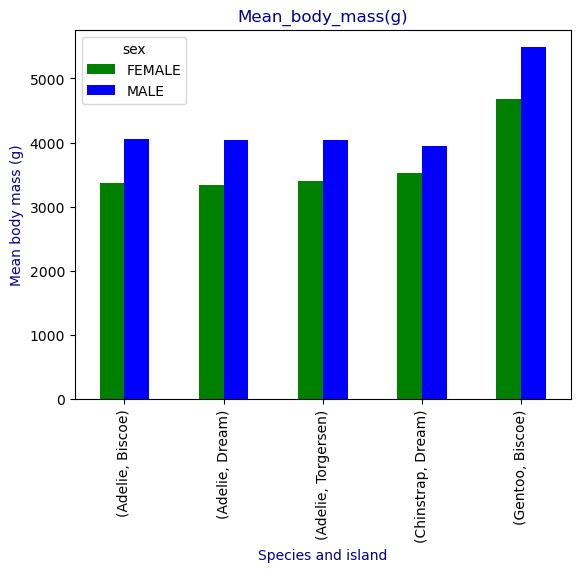

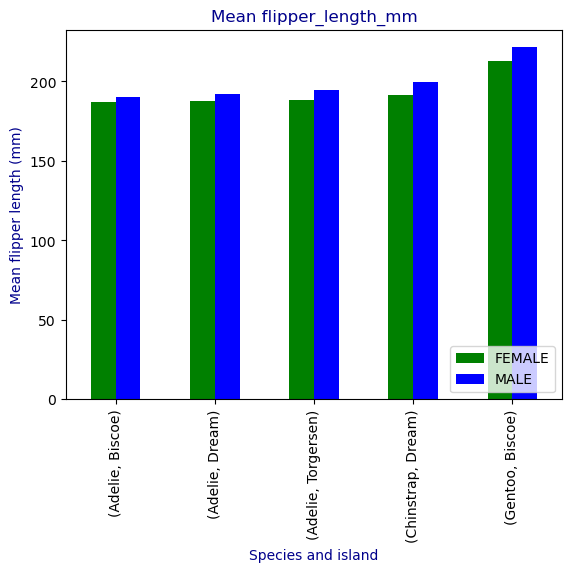

In [44]:
# bar chart body mass by island and species
df.groupby(['species', 'island', 'sex'])['body_mass_g'].mean().unstack().plot(kind='bar', color=[ 'g', 'blue'])
plt.xlabel('Species and island', color='darkblue')
plt.ylabel('Mean body mass (g)', color='darkblue')
plt.title('Mean_body_mass(g)', color='darkblue')
plt.show()

# bar chart mean flipper length by island and species
df.groupby(['species', 'island', 'sex'])['flipper_length_mm'].mean().unstack().plot(kind='bar', color=[ 'g', 'b'])
plt.xlabel('Species and island', color='darkblue')
plt.ylabel('Mean flipper length (mm)', color='darkblue')
plt.title('Mean flipper_length_mm', color='darkblue')
plt.legend(loc='lower right')
plt.show()

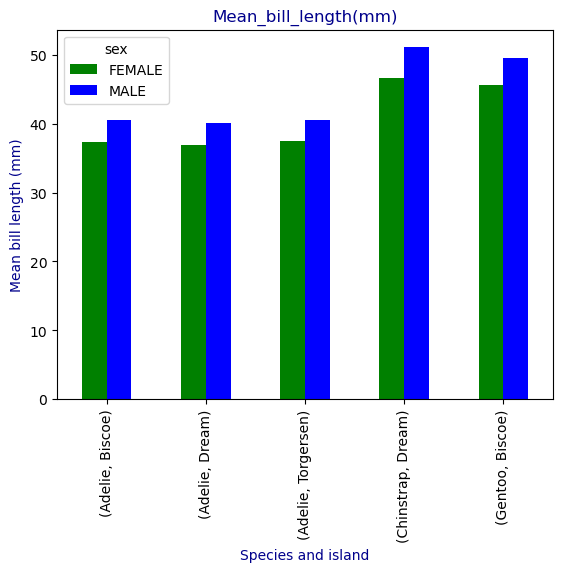

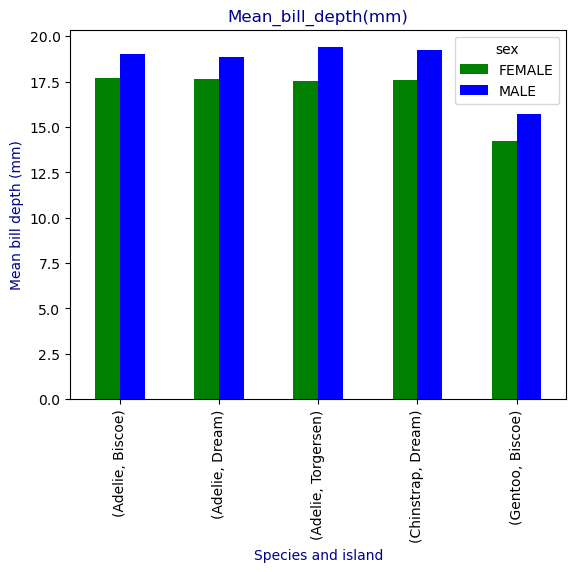

In [45]:
# bar chart bill length by island and species

df.groupby(['species', 'island', 'sex'])['bill_length_mm'].mean().unstack().plot(kind='bar', color=['g', 'b'])
plt.xlabel('Species and island', color='darkblue')
plt.ylabel('Mean bill length (mm)', color='darkblue')
plt.title('Mean_bill_length(mm)', color='darkblue')
plt.show()

# bar chart bill depth by island and species
df.groupby(['species', 'island', 'sex'])['bill_depth_mm'].mean().unstack().plot(kind='bar', color=[ 'g', 'b'])
plt.xlabel('Species and island', color='darkblue')
plt.ylabel('Mean bill depth (mm)', color='darkblue')
plt.title('Mean_bill_depth(mm)', color='darkblue')
plt.show()

### [Histograms:](https://www.w3schools.com/statistics/statistics_histograms.php)

Histograms are used to display continuous numerical data. The total area of all the bars is proportional to the total frequency. The width of the bars does not always have to be the same. 

In [46]:
# skewness of body mass per species 
df.groupby('species')['body_mass_g'].skew()


species
Adelie       0.279892
Chinstrap    0.247433
Gentoo       0.045573
Name: body_mass_g, dtype: float64

In [47]:

# skewness of flipper length per species
df.groupby('species')['flipper_length_mm'].skew()

species
Adelie       0.080407
Chinstrap   -0.009472
Gentoo       0.368750
Name: flipper_length_mm, dtype: float64

In [48]:
# skewness of bill length per species
df.groupby('species')['bill_length_mm'].skew()

species
Adelie       0.157788
Chinstrap   -0.090575
Gentoo       0.612086
Name: bill_length_mm, dtype: float64

In [49]:
# skewness of bill depth per species
df.groupby('species')['bill_depth_mm'].skew()


species
Adelie       0.314747
Chinstrap    0.006879
Gentoo       0.301757
Name: bill_depth_mm, dtype: float64

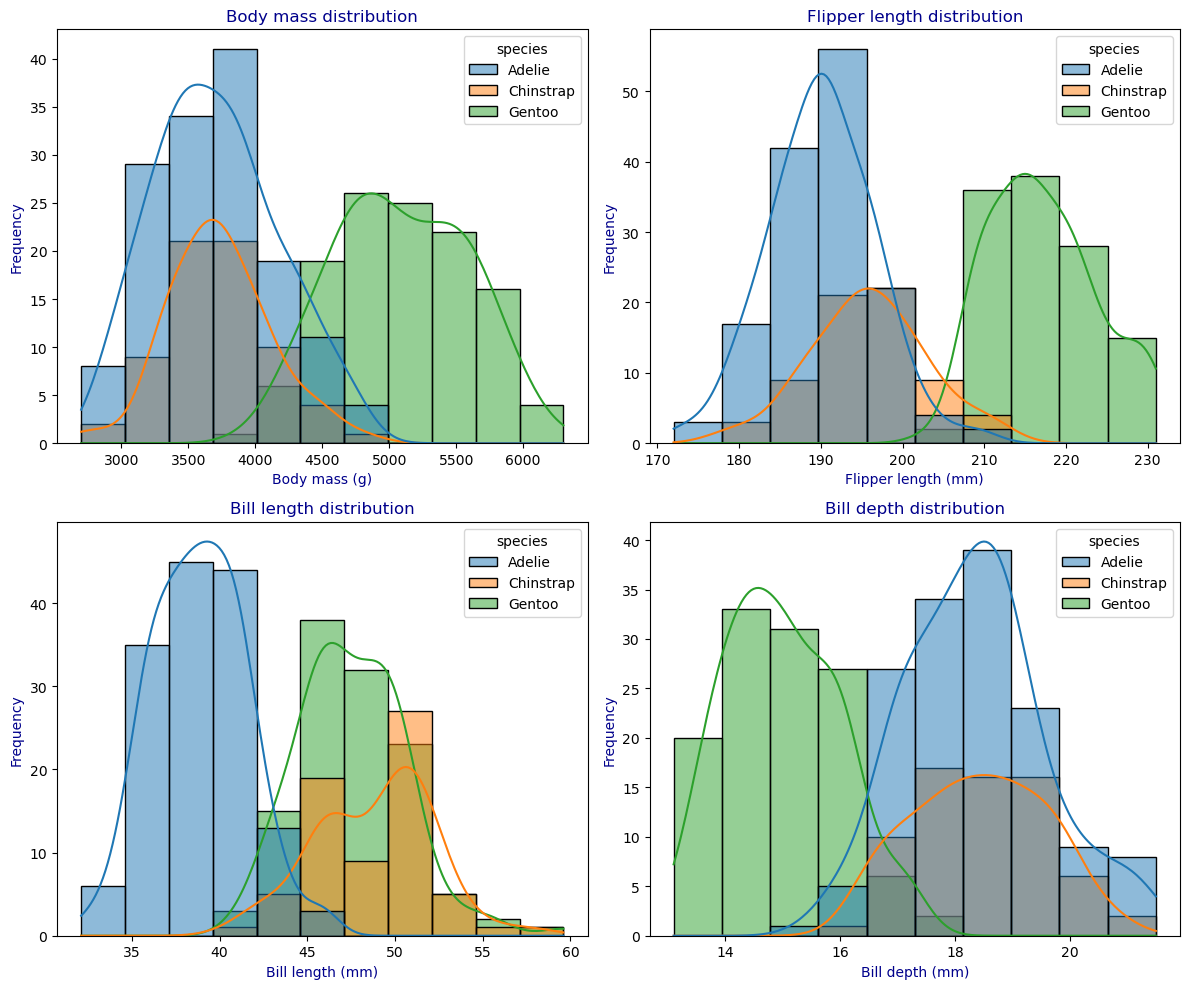

In [50]:
# suppress seaborn warnings 
import warnings
warnings.filterwarnings("ignore")


# historam subplots of body mass, flipper length, bill length and bill depth per species    
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df, x='body_mass_g', hue='species', kde=True, ax=axs[0, 0])
axs[0, 0].set_xlabel('Body mass (g)', color='darkblue')
axs[0, 0].set_ylabel('Frequency', color='darkblue')
axs[0, 0].set_title('Body mass distribution', color='darkblue')

sns.histplot(df, x='flipper_length_mm', hue='species', kde=True, ax=axs[0, 1])
axs[0, 1].set_xlabel('Flipper length (mm)', color='darkblue')
axs[0, 1].set_ylabel('Frequency', color='darkblue')
axs[0, 1].set_title('Flipper length distribution', color='darkblue')

sns.histplot(df, x='bill_length_mm', hue='species', kde=True, ax=axs[1, 0])
axs[1, 0].set_xlabel('Bill length (mm)', color='darkblue')
axs[1, 0].set_ylabel('Frequency', color='darkblue')
axs[1, 0].set_title('Bill length distribution', color='darkblue')

sns.histplot(df, x='bill_depth_mm', hue='species', kde=True, ax=axs[1, 1])
axs[1, 1].set_xlabel('Bill depth (mm)', color='darkblue')
axs[1, 1].set_ylabel('Frequency', color='darkblue')
axs[1, 1].set_title('Bill depth distribution', color='darkblue')

plt.tight_layout()
plt.show()

### [Boxplots](https://www.w3schools.com/statistics/statistics_box_plots.php) 

Boxplots show the distribution of data by displaying the minimum and maximum value, the first Quartile (25%: the lower part of the box), third quartile (75%: the upper area of the box), the median (50%: represented by a line inside the box). Boxplots give a visual summary of the data distribution and the presence of skewness/outliers. 


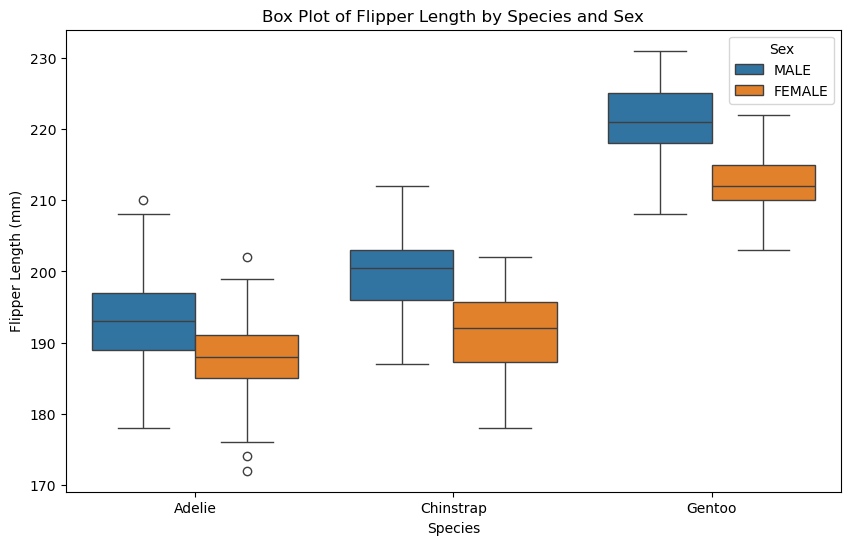

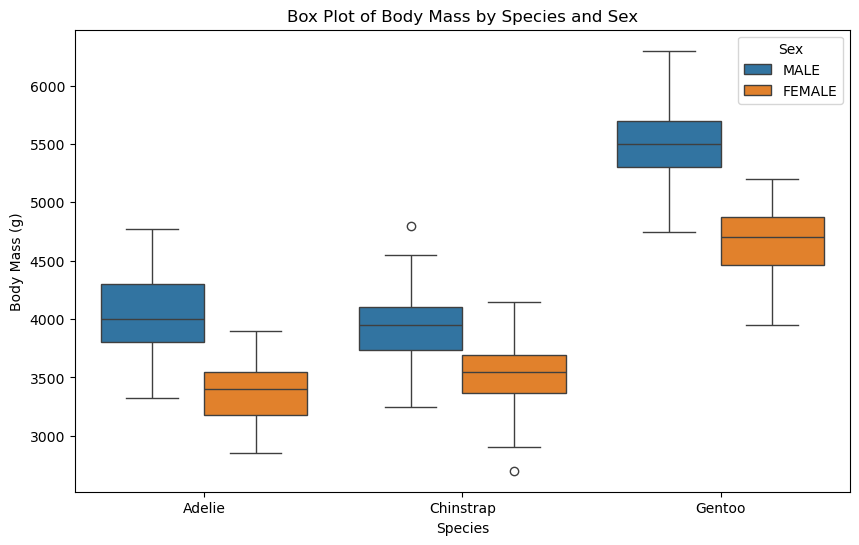

In [51]:

# box plot of body mass by species and sex
plt.figure(figsize=(10, 6))

palette = {'MALE':'blue', 'FEMALE':'pink' }

# Create the box plot
sns.boxplot(x='species', y='flipper_length_mm', hue='sex', data=df)

# Add title and labels
plt.title('Box Plot of Flipper Length by Species and Sex')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')

# Show legend
plt.legend(title='Sex')

# Show plot
plt.show()

# box plot of body mass by species and sex  
plt.figure(figsize=(10, 6))

palette ={'MALE':'blue', 'FEMALE':'pink'}

# Create the box plot
sns.boxplot(x='species', y='body_mass_g', hue='sex', data=df)

# Add title and labels
plt.title('Box Plot of Body Mass by Species and Sex')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')

# Show legend
plt.legend(title='Sex')

# Show plot
plt.show()


In [52]:
# skewness of flipper length by species 
df.groupby('species')['flipper_length_mm'].skew()

species
Adelie       0.080407
Chinstrap   -0.009472
Gentoo       0.368750
Name: flipper_length_mm, dtype: float64

In [53]:
# skewness of bill length by species
df.groupby('species')['bill_length_mm'].skew()


species
Adelie       0.157788
Chinstrap   -0.090575
Gentoo       0.612086
Name: bill_length_mm, dtype: float64

In [54]:
# skewness of bill depth by species
df.groupby('species')['bill_depth_mm'].skew()


species
Adelie       0.314747
Chinstrap    0.006879
Gentoo       0.301757
Name: bill_depth_mm, dtype: float64

### [Pairplot:](https://www.geeksforgeeks.org/python-seaborn-pairplot-method/)  

Scatterplot matrix to show relationships between pairs of variables in a dataset. 

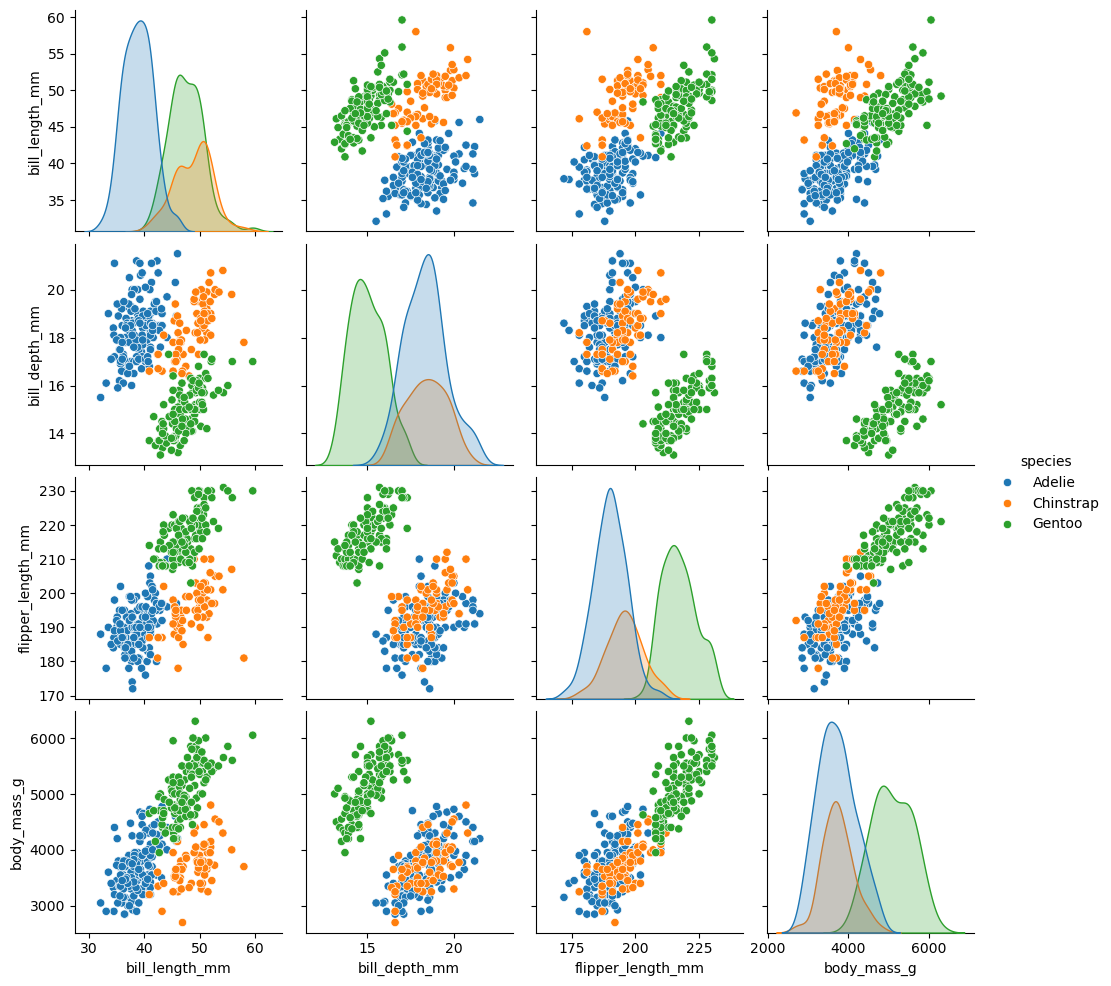

In [55]:

# pairplot of the data set in seaborn
sns.pairplot(df, hue='species')
plt.show()

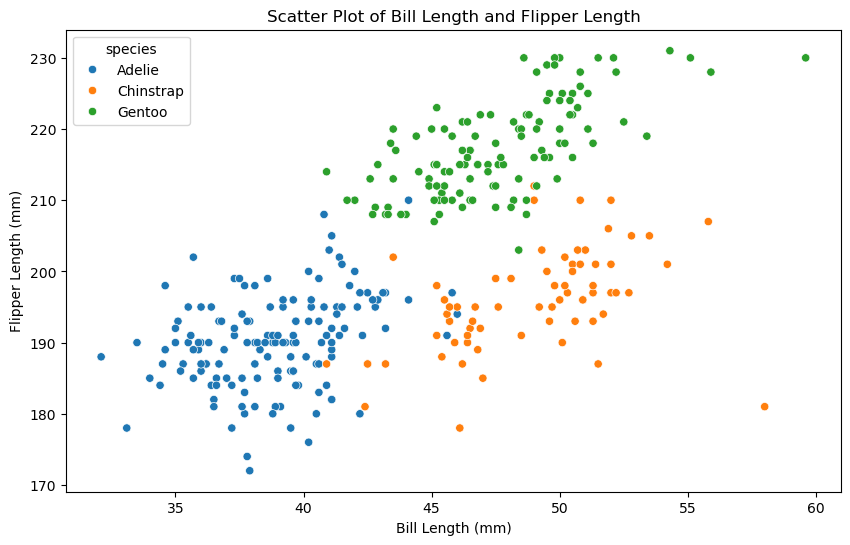

,bill_length_mm,flipper_length_mm
bill_length_mm,1.000000,0.653096
flipper_length_mm,0.653096,1.000000


In [57]:
#  test scatterplot of bill length and flipper length 
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', data=df, hue='species')

# Add title and labels
plt.title('Scatter Plot of Bill Length and Flipper Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.show()

# correlation coefficient of bill length and flipper length
df[['bill_length_mm', 'flipper_length_mm']].corr()


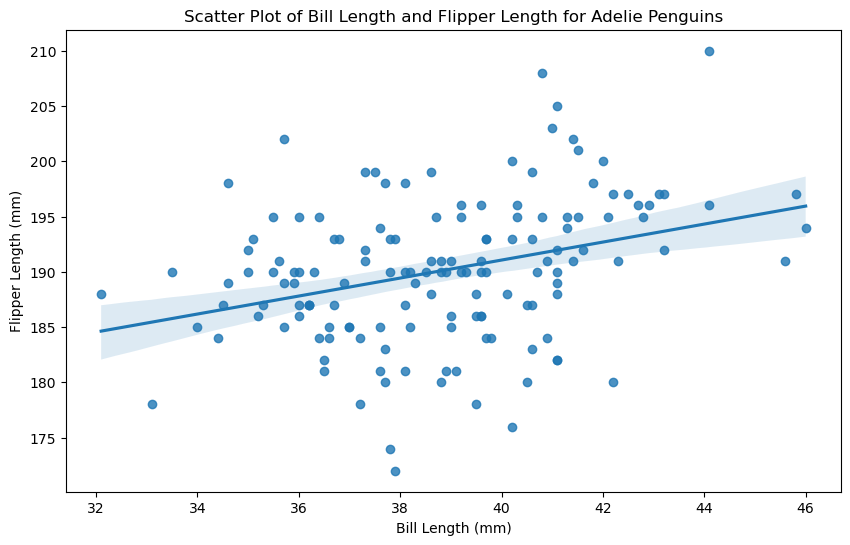

,bill_length_mm,flipper_length_mm
bill_length_mm,1.000000,0.332274
flipper_length_mm,0.332274,1.000000


In [58]:
# scatterplot of bill length and flipper length for adelie penguins with regression line
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.regplot(x='bill_length_mm', y='flipper_length_mm', data=df[df['species'] == 'Adelie'])

# Add title and labels
plt.title('Scatter Plot of Bill Length and Flipper Length for Adelie Penguins')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.show()

# correlation coefficient of bill length and flipper length for adelie penguins 
df[df['species'] == 'Adelie'][['bill_length_mm', 'flipper_length_mm']].corr()



***
## **Correlation:**


### [Scatterplot:]("https://www.jmp.com/en_be/statistics-knowledge-portal/exploratory-data-analysis/scatter-plot.html")

Scatterplots can be used to investigate correlations or relationships between two sets of measurements. 

#### Flipper Length vs Body mass


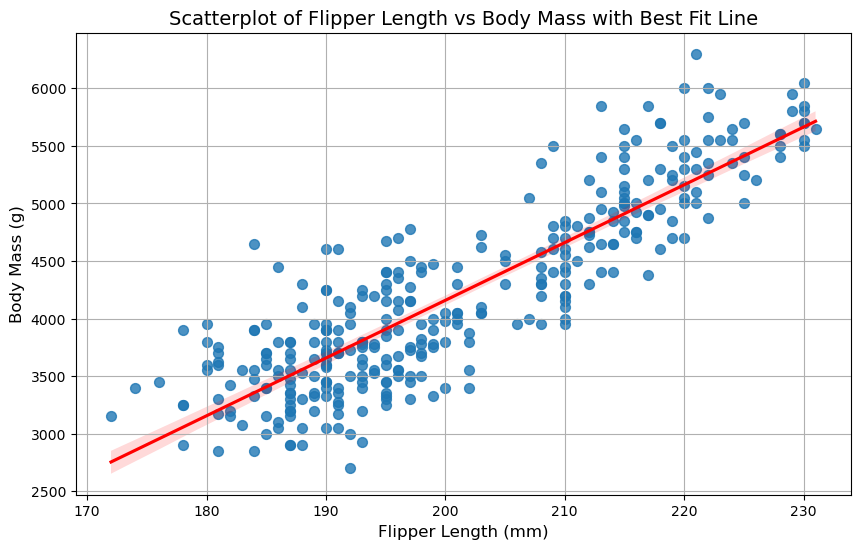

In [59]:
# add best fit line to the scatter plot above
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='flipper_length_mm', y='body_mass_g', scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Set plot labels and title
plt.xlabel('Flipper Length (mm)', fontsize=12)
plt.ylabel('Body Mass (g)', fontsize=12)
plt.title('Scatterplot of Flipper Length vs Body Mass with Best Fit Line', fontsize=14)

# Show plot
plt.grid(True)

In [60]:
m, c = np.polyfit(df['flipper_length_mm'], df['body_mass_g'], 1) # slope and intercept
m, c

(50.15326594224113, -5872.0926828428255)

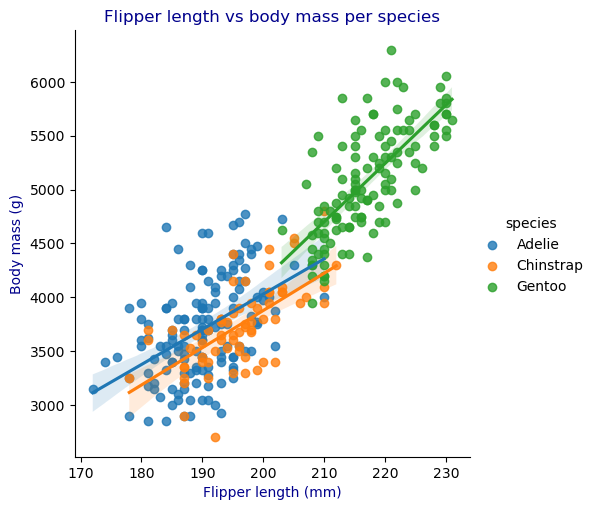

In [61]:
# scatter plot of flipper length vs body mass in sns with regression line
sns.lmplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.xlabel('Flipper length (mm)', color='darkblue')
plt.ylabel('Body mass (g)', color='darkblue')
plt.title('Flipper length vs body mass per species', color='darkblue')
plt.show()

#### Bill length vs Bill depth

Correlation between bill length and bill depth: -0.22862563591302934


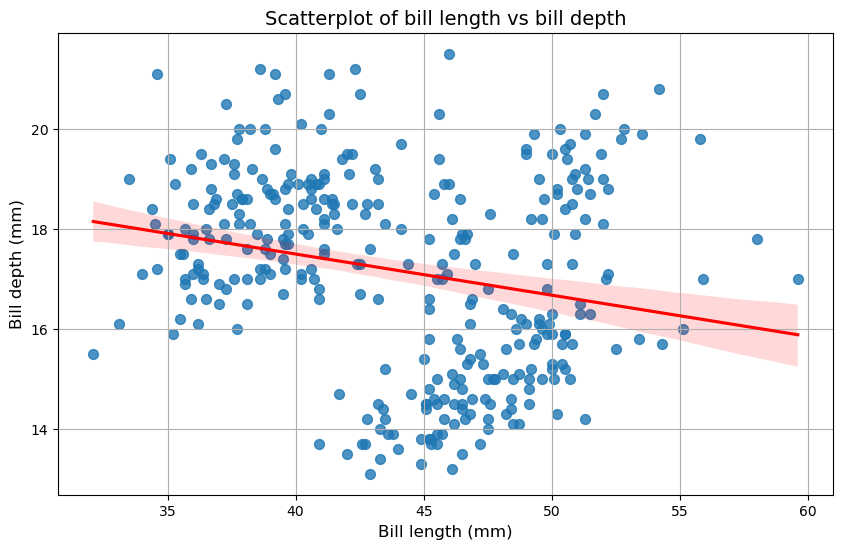

In [62]:
# test scatterplot
# add best fit line to the scatter plot above
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='bill_length_mm', y='bill_depth_mm', scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Set plot labels and title
plt.xlabel('Bill length (mm)', fontsize=12)
plt.ylabel('Bill depth (mm)', fontsize=12)
plt.title('Scatterplot of bill length vs bill depth', fontsize=14)

# Show plot
plt.grid(True)

# correlation of bill length and bill depth
correlation = df['bill_length_mm'].corr(df['bill_depth_mm'])
print('Correlation between bill length and bill depth:', correlation)

In [63]:
m, c = np.polyfit(df['bill_length_mm'], df['bill_depth_mm'], 1)
m, c

(-0.08232675339862279, 20.786648668433816)

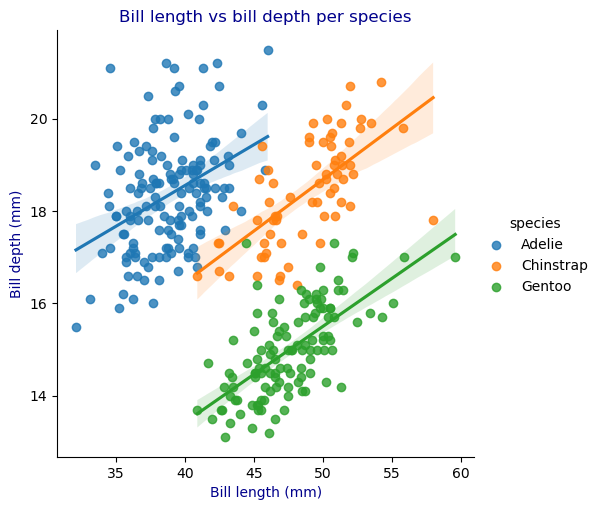

In [64]:
# scatter plot of bill length vs bill depth in sns with regression line
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.xlabel('Bill length (mm)', color='darkblue')
plt.ylabel('Bill depth (mm)', color='darkblue')
plt.title('Bill length vs bill depth per species', color='darkblue')
plt.show()


[Simpsons Paradox:](https://en.wikipedia.org/wiki/Simpson%27s_paradox) a dataset in general may appear to have a trend in positive or negative direction, but then trends in the opposite direction when sub grouping. A negative linear relationship is observed between bill length and depth for the dataset indicating the longer the bill. the less depth of the bill. However, when analysing the data separated by species, a positive linear relationship is seen. 

#### Adelie: Bill length vs Bill depth

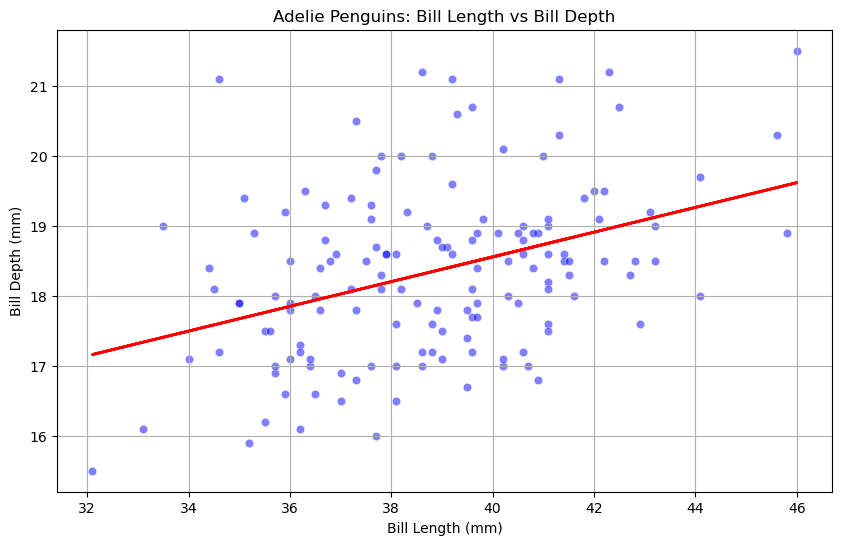

Correlation Coefficient (Adelie Penguins): 0.3858132004955791


In [65]:
# from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LinearRegression

# Filter data for Adelie penguins
adelie_df = df[df['species'] == 'Adelie']

# Plot scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=adelie_df, color='blue', alpha=0.5)

# Fit linear regression model
X = adelie_df[['bill_length_mm']]
y = adelie_df['bill_depth_mm']
model = LinearRegression()
model.fit(X, y)

# Plot regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

# Add labels and title
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Adelie Penguins: Bill Length vs Bill Depth')

# Show plot
plt.grid(True)
plt.show()

# Calculate correlation coefficient for Adelie penguins
adelie_correlation_coefficient = adelie_df['bill_length_mm'].corr(adelie_df['bill_depth_mm'])

print("Correlation Coefficient (Adelie Penguins):", adelie_correlation_coefficient)


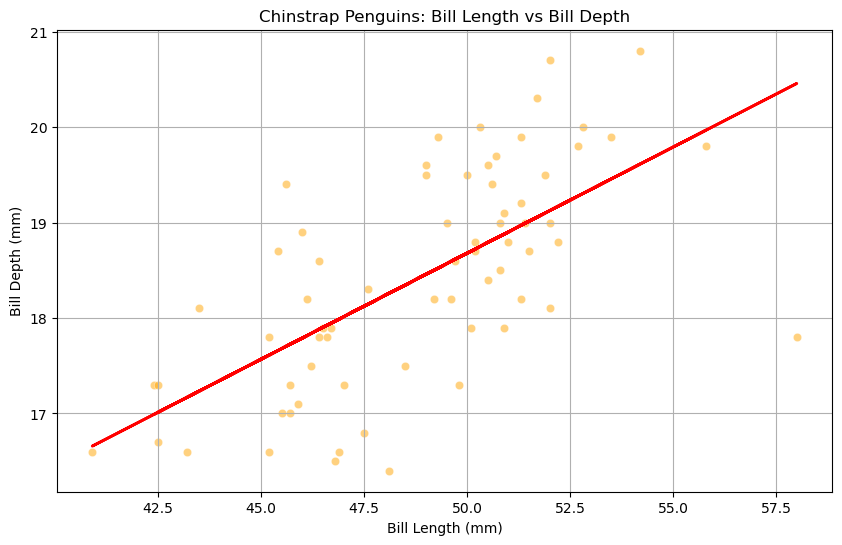

Correlation Coefficient (Chinstrap Penguins): 0.6535362081800429


In [66]:
# Filter data for Chinstrap penguins
chinstrap_df = df[df['species'] == 'Chinstrap']

# Plot scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=chinstrap_df, color='orange', alpha=0.5)

# Fit linear regression model
X = chinstrap_df[['bill_length_mm']]
y = chinstrap_df['bill_depth_mm']
model = LinearRegression()
model.fit(X, y)

# Plot regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

# Add labels and title
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Chinstrap Penguins: Bill Length vs Bill Depth')

# Show plot
plt.grid(True)
plt.show()

# Calculate correlation coefficient for Chinstrap penguins
chinstrap_correlation_coefficient = chinstrap_df['bill_length_mm'].corr(chinstrap_df['bill_depth_mm'])

print("Correlation Coefficient (Chinstrap Penguins):", chinstrap_correlation_coefficient)


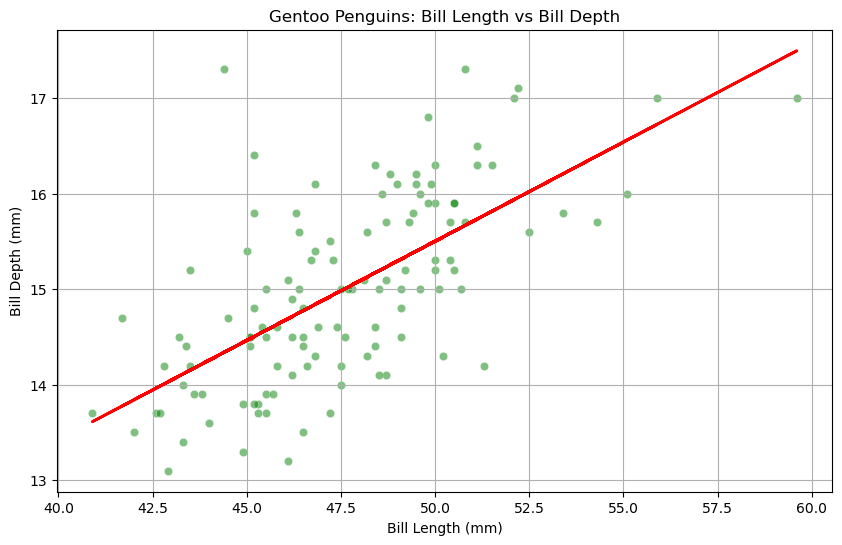

Correlation Coefficient (Gentoo Penguins): 0.6540233142726541


In [67]:
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

# Filter data for Gentoo penguins
gentoo_df = df[df['species'] == 'Gentoo']

# Plot scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=gentoo_df, color='green', alpha=0.5)

# Fit linear regression model
X = gentoo_df[['bill_length_mm']]
y = gentoo_df['bill_depth_mm']
model = LinearRegression()
model.fit(X, y)

# Plot regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

# Add labels and title
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Gentoo Penguins: Bill Length vs Bill Depth')

# Show plot
plt.grid(True)
plt.show()


# Filter data for Gentoo penguins
gentoo_df = df[df['species'] == 'Gentoo']

# Calculate correlation coefficient for Gentoo penguins
gentoo_correlation_coefficient = gentoo_df['bill_length_mm'].corr(gentoo_df['bill_depth_mm'])

print("Correlation Coefficient (Gentoo Penguins):", gentoo_correlation_coefficient)

#### [Heatmap:](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Heatmaps used to visualise correlation between variables 

Correlation between numerical variables:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


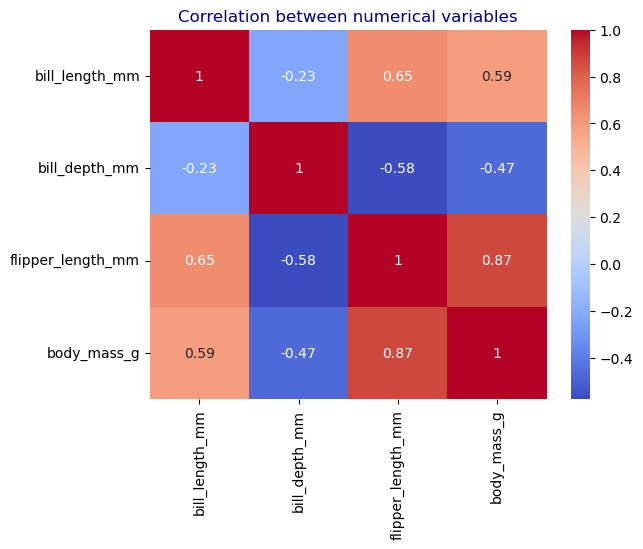

In [68]:
# correlation matrix of numerical variables
numerical_variables = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
 
correlation = df[numerical_variables].corr()
print('Correlation between numerical variables:')
print(correlation)

# correlation matrix heatmap    
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between numerical variables', color='darkblue')

plt.show()



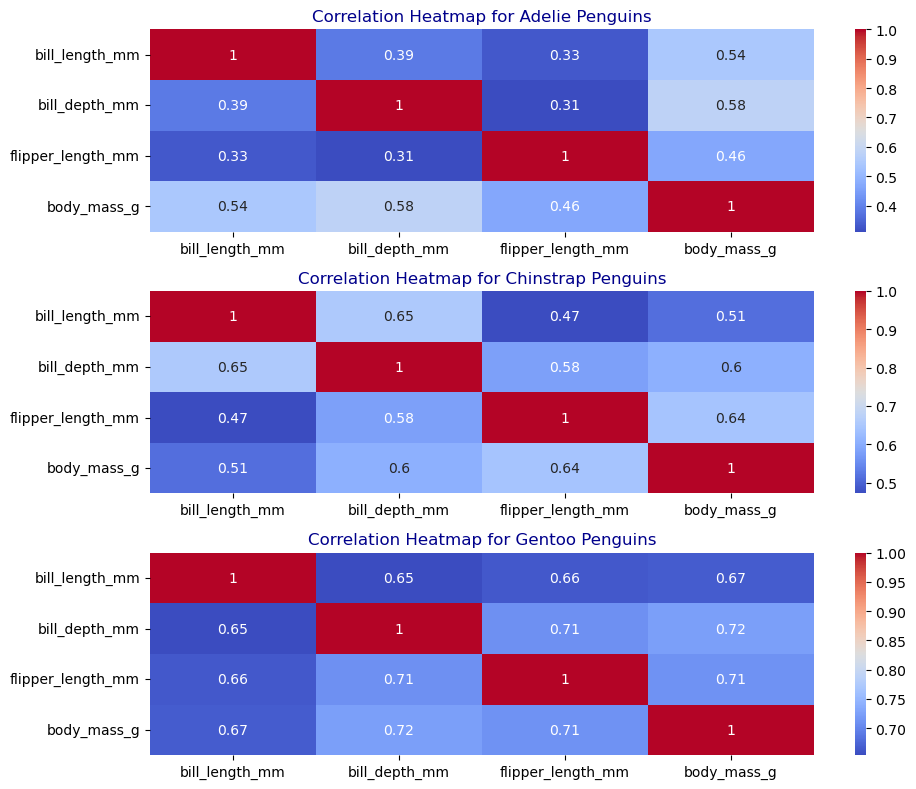

In [69]:

# Heatmap of correlation matrix for each species.
# code from chat.openai.com and edited. 
# Define a list of species
species_list = df['species'].unique()

# Create subplots for each species
fig, axes = plt.subplots(nrows=len(species_list), figsize=(10, 8))

# Iterate over each species
for i, species in enumerate(species_list):
    # Filter data for the current species
    species_df = df[df['species'] == species]
    
    # Filter numerical variables
    numerical_variables = species_df.select_dtypes(include=['int64', 'float64'])
    
    # Calculate correlation matrix
    correlation = numerical_variables.corr()
    
    # Create heatmap for the current species
    sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f'Correlation Heatmap for {species} Penguins', color='darkblue')

plt.tight_layout()
plt.show()

# code from openai.com and edited. 


There is a strong positive correlation of 0.87 between body mass and flipper length for all species of penguin. 

In [70]:
from scipy.stats import linregress

# Assuming X contains flipper length and Y contains body mass
X = df['flipper_length_mm']
Y = df['body_mass_g']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(X, Y)

print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("P-value:", p_value)
print("Standard error:", std_err)




Slope: 50.15326594224111
Intercept: -5872.092682842823
R-squared: 0.7620921573403913
P-value: 3.1328362509719978e-105
Standard error: 1.5402309838246344


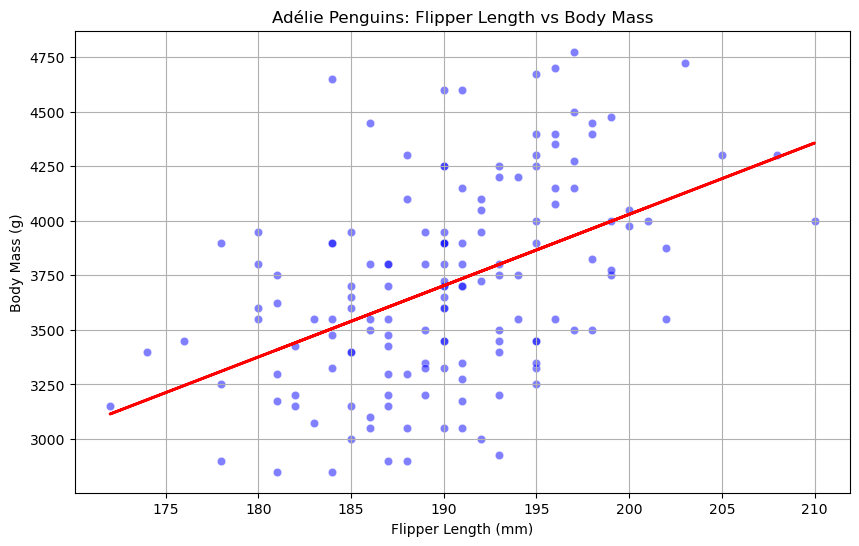

Correlation Coefficient (Adélie Penguins): 0.4648539302610766


In [71]:
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression


# Filter data for Adélie penguins
adelie_df = df[df['species'] == 'Adelie']

# Plot scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df, color='blue', alpha=0.5)

# Fit linear regression model
X = adelie_df[['flipper_length_mm']]
y = adelie_df['body_mass_g']
model = LinearRegression()
model.fit(X, y)

# Plot regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

# Add labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Adélie Penguins: Flipper Length vs Body Mass')

# Show plot
plt.grid(True)
plt.show()

# Calculate correlation coefficient for Adélie penguins
adelie_correlation_coefficient = adelie_df['flipper_length_mm'].corr(adelie_df['body_mass_g'])
print("Correlation Coefficient (Adélie Penguins):", adelie_correlation_coefficient)


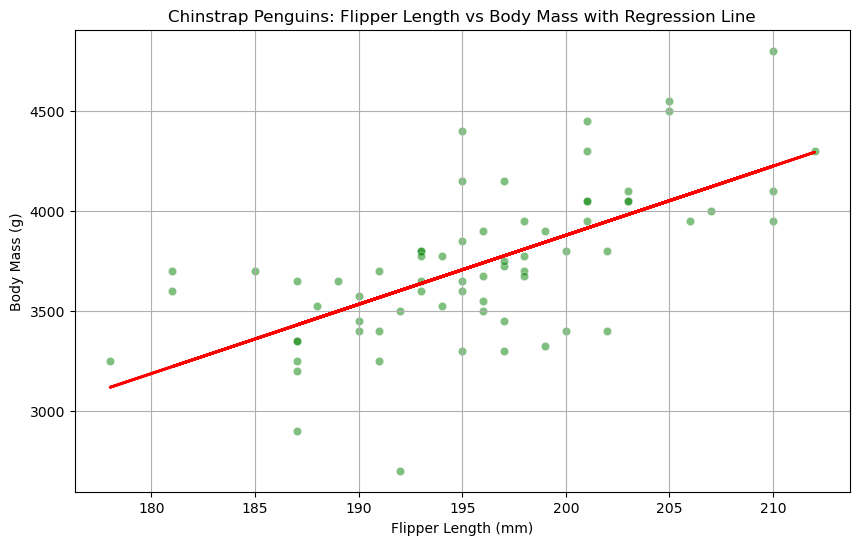

Correlation Coefficient (Chinstrap Penguins): 0.6415594129316968


In [72]:
# Filter data for Chinstrap penguins
chinstrap_df = df[df['species'] == 'Chinstrap']

# Plot scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=chinstrap_df, color='green', alpha=0.5)

# Fit linear regression model
X = chinstrap_df[['flipper_length_mm']]
y = chinstrap_df['body_mass_g']
model = LinearRegression()
model.fit(X, y)

# Plot regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

# Add labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Chinstrap Penguins: Flipper Length vs Body Mass with Regression Line')

# Show plot
plt.grid(True)
plt.show()


# Filter data for Chinstrap penguins
chinstrap_df = df[df['species'] == 'Chinstrap']

# Calculate correlation coefficient for Chinstrap penguins
chinstrap_correlation_coefficient = chinstrap_df['flipper_length_mm'].corr(chinstrap_df['body_mass_g'])

print("Correlation Coefficient (Chinstrap Penguins):", chinstrap_correlation_coefficient)


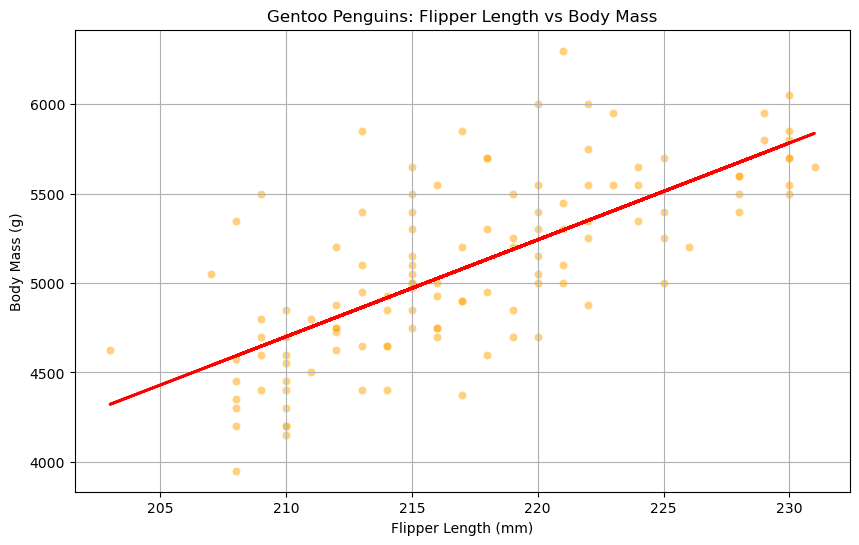

Correlation Coefficient (Gentoo Penguins): 0.7113052561445228


In [73]:

# Filter data for Gentoo penguins
gentoo_df = df[df['species'] == 'Gentoo']

# Plot scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=gentoo_df, color='orange', alpha=0.5)

# Fit linear regression model
X = gentoo_df[['flipper_length_mm']]
y = gentoo_df['body_mass_g']
model = LinearRegression()
model.fit(X, y)

# Plot regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

# Add labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Gentoo Penguins: Flipper Length vs Body Mass')

# Show plot
plt.grid(True)
plt.show()


# Filter data for Gentoo penguins
gentoo_df = df[df['species'] == 'Gentoo']

# Calculate correlation coefficient for Gentoo penguins
gentoo_correlation_coefficient = gentoo_df['flipper_length_mm'].corr(gentoo_df['body_mass_g'])

print("Correlation Coefficient (Gentoo Penguins):", gentoo_correlation_coefficient)


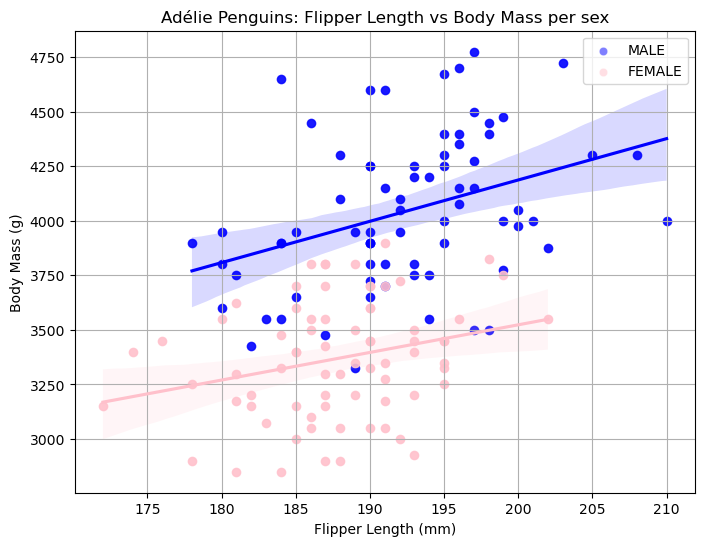

Correlation Coefficient (Male Adélie Penguins): nan
Correlation Coefficient (Female Adélie Penguins): nan


In [74]:
# Plot scatterplot with regression line for male Adélie penguins
plt.figure(figsize=(8, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df[adelie_df['sex'] == 'MALE'], color='blue', alpha=0.5, label='MALE')
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df[adelie_df['sex'] == 'MALE'], color='blue')

# Plot scatterplot with regression line for female Adélie penguins
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df[adelie_df['sex'] == 'FEMALE'], color='pink', alpha=0.5, label='FEMALE')
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df[adelie_df['sex'] == 'FEMALE'], color='pink')

# Add labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Adélie Penguins: Flipper Length vs Body Mass per sex')

# Show plot
plt.legend()
plt.grid(True)
plt.show()



# Calculate correlation coefficient for male Adélie penguins
male_adelie_df = adelie_df[adelie_df['sex'] == 'male']
male_adelie_correlation_coefficient = male_adelie_df['flipper_length_mm'].corr(male_adelie_df['body_mass_g'])
print("Correlation Coefficient (Male Adélie Penguins):", male_adelie_correlation_coefficient)

# Calculate correlation coefficient for female Adélie penguins
female_adelie_df = adelie_df[adelie_df['sex'] == 'female']
female_adelie_correlation_coefficient = female_adelie_df['flipper_length_mm'].corr(female_adelie_df['body_mass_g'])
print("Correlation Coefficient (Female Adélie Penguins):", female_adelie_correlation_coefficient)


In [75]:


# Filter data for Adélie penguins
adelie_df = df[df['species'] == 'Adelie']

# Calculate correlation coefficient for male Adélie penguins
male_adelie_df = adelie_df[adelie_df['sex'] == 'male']
male_adelie_correlation_coefficient = male_adelie_df['flipper_length_mm'].corr(male_adelie_df['body_mass_g'])
print("Correlation Coefficient (Male Adélie Penguins):", male_adelie_correlation_coefficient)

# Calculate correlation coefficient for female Adélie penguins
female_adelie_df = adelie_df[adelie_df['sex'] == 'female']
female_adelie_correlation_coefficient = female_adelie_df['flipper_length_mm'].corr(female_adelie_df['body_mass_g'])
print("Correlation Coefficient (Female Adélie Penguins):", female_adelie_correlation_coefficient)

# Filter data for Chinstrap penguins
chinstrap_df = df[df['species'] == 'Chinstrap']

# Calculate correlation coefficient for male Chinstrap penguins
male_chinstrap_df = chinstrap_df[chinstrap_df['sex'] == 'MALE']
male_chinstrap_correlation_coefficient = male_chinstrap_df['flipper_length_mm'].corr(male_chinstrap_df['body_mass_g'])
print("Correlation Coefficient (Male Chinstrap Penguins):", male_chinstrap_correlation_coefficient)

# Calculate correlation coefficient for female Chinstrap penguins
female_chinstrap_df = chinstrap_df[chinstrap_df['sex'] == 'FEMALE']
female_chinstrap_correlation_coefficient = female_chinstrap_df['flipper_length_mm'].corr(female_chinstrap_df['body_mass_g'])
print("Correlation Coefficient (Female Chinstrap Penguins):", female_chinstrap_correlation_coefficient)


# Filter data for Gentoo penguins
gentoo_df = df[df['species'] == 'Gentoo']

# Calculate correlation coefficient for male Gentoo penguins
male_gentoo_df = gentoo_df[gentoo_df['sex'] == 'MALE']
male_correlation_coefficient = male_gentoo_df['flipper_length_mm'].corr(male_gentoo_df['body_mass_g'])
print("Correlation Coefficient (Male Gentoo Penguins):", male_correlation_coefficient)

# Calculate correlation coefficient for female Gentoo penguins
female_gentoo_df = gentoo_df[gentoo_df['sex'] == 'FEMALE']
female_correlation_coefficient = female_gentoo_df['flipper_length_mm'].corr(female_gentoo_df['body_mass_g'])
print("Correlation Coefficient (Female Gentoo Penguins):", female_correlation_coefficient)

Correlation Coefficient (Male Adélie Penguins): nan
Correlation Coefficient (Female Adélie Penguins): nan
Correlation Coefficient (Male Chinstrap Penguins): 0.6645877076388736
Correlation Coefficient (Female Chinstrap Penguins): 0.24215001572228773
Correlation Coefficient (Male Gentoo Penguins): 0.3304519850062649
Correlation Coefficient (Female Gentoo Penguins): 0.48761802443174745


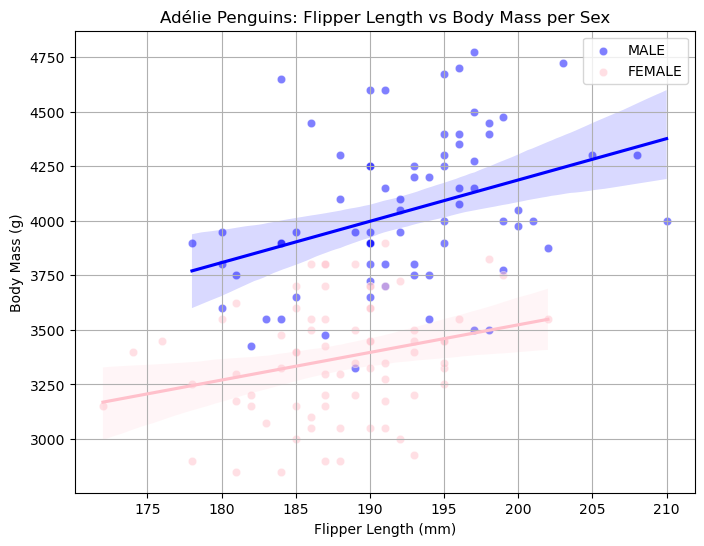

In [76]:

# Filter data for Adélie penguins
adelie_df = df[df['species'] == 'Adelie']

# Plot scatterplot with regression line for male Adélie penguins
plt.figure(figsize=(8, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df[adelie_df['sex'] == 'MALE'], color='blue', alpha=0.5, label='MALE')
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df[adelie_df['sex'] == 'MALE'], scatter=False, color='blue')

# Plot scatterplot with regression line for female Adélie penguins
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df[adelie_df['sex'] == 'FEMALE'], color='pink', alpha=0.5, label='FEMALE')
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=adelie_df[adelie_df['sex'] == 'FEMALE'], scatter=False, color='pink')

# Add labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Adélie Penguins: Flipper Length vs Body Mass per Sex')

# Show plot
plt.legend()
plt.grid(True)
plt.show()



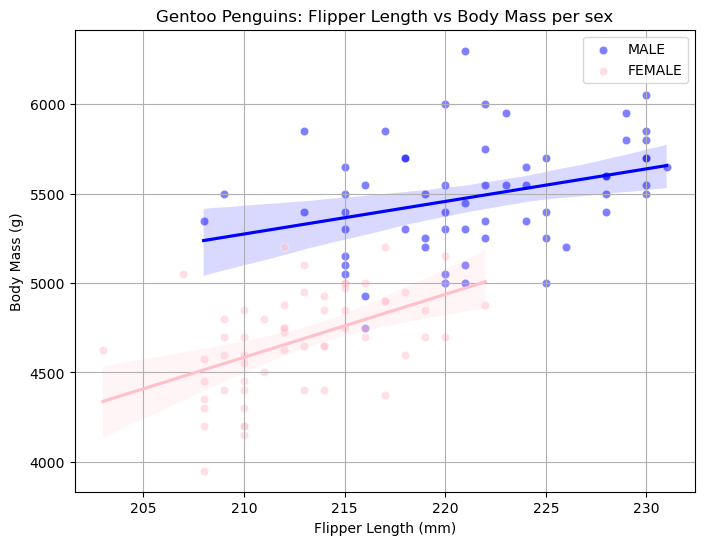

Correlation Coefficient (Male Gentoo Penguins): 0.3304519850062649
Correlation Coefficient (Female Gentoo Penguins): 0.48761802443174745


In [77]:
# Filter data for Gentoo penguins
gentoo_df = df[df['species'] == 'Gentoo']

# Plot scatterplot with lighter colors for male Gentoo penguins
plt.figure(figsize=(8, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=gentoo_df[gentoo_df['sex'] == 'MALE'], color='blue', alpha=0.5, label='MALE')
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=gentoo_df[gentoo_df['sex'] == 'MALE'], color='blue', scatter=False)

# Plot scatterplot with lighter colors for female Gentoo penguins
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=gentoo_df[gentoo_df['sex'] == 'FEMALE'], color='pink', alpha=0.5, label='FEMALE')
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=gentoo_df[gentoo_df['sex'] == 'FEMALE'], color='pink', scatter=False)

# Add labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Gentoo Penguins: Flipper Length vs Body Mass per sex')

# Show plot
plt.legend()
plt.grid(True)
plt.show()



# Calculate correlation coefficient for male Gentoo penguins
male_gentoo_df = gentoo_df[gentoo_df['sex'] == 'MALE']
male_correlation_coefficient = male_gentoo_df['flipper_length_mm'].corr(male_gentoo_df['body_mass_g'])
print("Correlation Coefficient (Male Gentoo Penguins):", male_correlation_coefficient)

# Calculate correlation coefficient for female Gentoo penguins
female_gentoo_df = gentoo_df[gentoo_df['sex'] == 'FEMALE']
female_correlation_coefficient = female_gentoo_df['flipper_length_mm'].corr(female_gentoo_df['body_mass_g'])
print("Correlation Coefficient (Female Gentoo Penguins):", female_correlation_coefficient)


Notes: correlation coefficients indicate the strength and direction of the linear relationship between flipper length and body mass for male and female Gentoo penguins. 

A correlation of 0.33 indicates a weak positive linear relationship between the flipper length and body mass for male Gentoo penguins. This means that as flipper length increases, body mass tends to increase but the relationship is not very strong. For female Gentoo penguins a correlation coefficient of 0.48 indicates a moderate positive linear relationship between flipper length and body mass for female Gentoo penguins. The relationship is stronger in comparison to male Gentoo penguins. 

in both cases, positive correlation indicates that as one variable increases the other variable tends to increase also. However, the strength of the relationship is different with a correlation coefficiant closer to 1 indicating a strong linear relationship. 

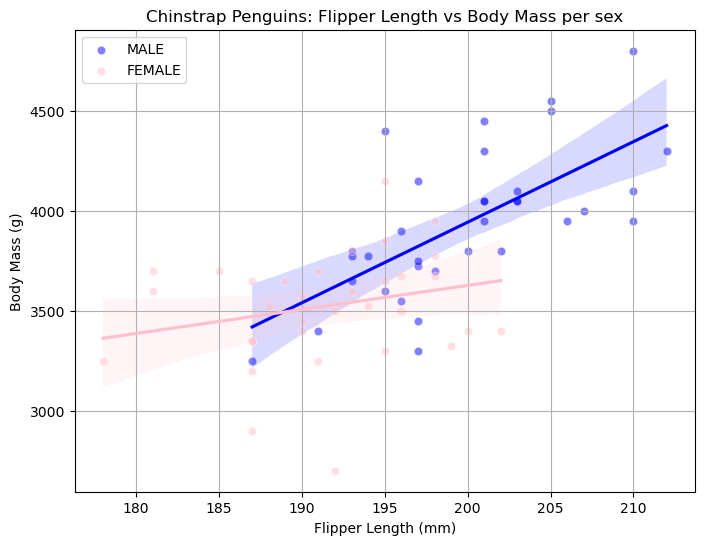

Correlation Coefficient (Male Chinstrap Penguins): 0.6645877076388736
Correlation Coefficient (Female Chinstrap Penguins): 0.24215001572228773


In [78]:
# Filter data for Chinstrap penguins
chinstrap_df = df[df['species'] == 'Chinstrap']

# Plot scatterplot with lighter colors for male Chinstrap penguins
plt.figure(figsize=(8, 6))
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=chinstrap_df[chinstrap_df['sex'] == 'MALE'], color='blue', alpha=0.5, label='MALE')
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=chinstrap_df[chinstrap_df['sex'] == 'MALE'], color='blue', scatter=False)

# Plot scatterplot with lighter colors for female Chinstrap penguins
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=chinstrap_df[chinstrap_df['sex'] == 'FEMALE'], color='pink', alpha=0.5, label='FEMALE')
sns.regplot(x='flipper_length_mm', y='body_mass_g', data=chinstrap_df[chinstrap_df['sex'] == 'FEMALE'], color='pink', scatter=False)

# Add labels and title
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Chinstrap Penguins: Flipper Length vs Body Mass per sex')

# Show plot
plt.legend()
plt.grid(True)
plt.show()


# Calculate correlation coefficient for male and female Chinstrap penguins
male_chinstrap_df = chinstrap_df[chinstrap_df['sex'] == 'MALE']
female_chinstrap_df = chinstrap_df[chinstrap_df['sex'] == 'FEMALE']

male_correlation_coefficient = male_chinstrap_df['flipper_length_mm'].corr(male_chinstrap_df['body_mass_g'])
female_correlation_coefficient = female_chinstrap_df['flipper_length_mm'].corr(female_chinstrap_df['body_mass_g'])

print("Correlation Coefficient (Male Chinstrap Penguins):", male_correlation_coefficient)
print("Correlation Coefficient (Female Chinstrap Penguins):", female_correlation_coefficient)


#### End
***